In [ ]:
!pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.1 MB/s eta 0:00:00


# Feature engineering



In [ ]:
import wooldridge as wd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def function(row):
  nc = row['northcen']
  st = row['south']
  west = row['west']

  if nc == 1:
    return 'northcen'
  elif st == 1:
    return 'south'
  elif west == 1:
    return 'west'
  else:
    return 'east'

wage = wd.data("wage1")
t = wage.apply(function, axis=1)
wage_p = (wage.assign(ethnicity=np.where(wage['nonwhite'] == 1, "nonwhite", "white"),
                  gender=np.where(wage['female'] == 1, "female", "male"),
                  fam_status=np.where(wage['married'] == 1, "married", "single"),
                  region=[np.random.choice([i, np.nan], p=(0.75, 0.25)) for i in t],
                  wage=[np.random.choice([i, np.nan], p=(0.75, 0.25)) for i in wage['wage']],
                  educ=[np.random.choice([i, np.nan], p=(0.8, 0.2)) for i in wage['educ']],
                  exper=[np.random.choice([i, np.nan], p=(0.95, 0.05)) for i in wage['exper']])
          .drop(columns=['nonwhite', 'female', 'married', 'northcen', 'south', 'west',
                          'profserv', 'profocc', 'clerocc', 'servocc', 'lwage', 'expersq', 'tenursq',
                          'smsa', 'construc', 'ndurman', 'trcommpu', 'trade', 'services']))

In [ ]:
wd.data("wage1", description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

## Data imputation

In [ ]:
wage_p.isna().sum()

wage          147
educ          117
exper          35
tenure          0
numdep          0
ethnicity       0
gender          0
fam_status      0
region          0
dtype: int64

In [ ]:
wage_p.head()

,wage,educ,exper,tenure,numdep,ethnicity,gender,fam_status,region
0,NaN,11.0,2.0,0,2,white,female,single,west
1,3.24,NaN,22.0,2,3,white,female,married,west
2,3.00,11.0,2.0,0,2,white,male,single,nan
3,NaN,8.0,44.0,28,0,white,male,married,west
4,5.30,NaN,7.0,2,1,white,male,married,west


### SimpleImputer

In [ ]:
wage2 = wage_p.copy()

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')

In [ ]:
mean = imp_mean.fit_transform(wage2['wage'].to_numpy().reshape(-1, 1))
median = imp_median.fit_transform(wage2['wage'].to_numpy().reshape(-1, 1))

### IterativeImputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp_ii = imp.fit_transform(wage2['wage'].to_numpy().reshape(-1, 1))

### KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

iki = KNNImputer(n_neighbors=4)
imp_iki = iki.fit_transform(wage2['wage'].to_numpy().reshape(-1, 1))

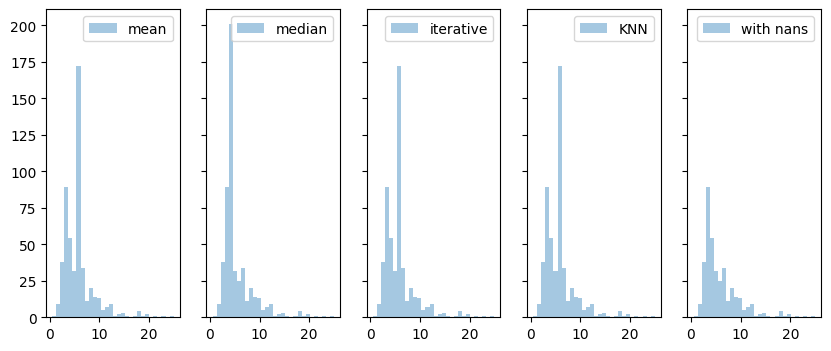

In [ ]:
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(10,4))
ax[0].hist(mean, bins=30, alpha=0.4, label='mean')
ax[0].legend()
ax[1].hist(median, bins=30, alpha=0.4, label='median')
ax[1].legend()
ax[2].hist(imp_ii, bins=30, alpha=0.4, label='iterative')
ax[2].legend()
ax[3].hist(imp_iki, bins=30, alpha=0.4, label='KNN')
ax[3].legend()
ax[4].hist(wage2['wage'], bins=30, alpha=0.4, label='with nans')
ax[4].legend()
plt.show()

## Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### OrdinalEncoder

In [ ]:
ord = OrdinalEncoder()
ord.fit_transform(wage_p['gender'].to_numpy().reshape(-1, 1))

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

### OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first')
ohe.fit_transform(wage_p['region'].to_numpy().reshape(-1, 1)).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

## Scalers

In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler

### MaxAbsScaler

In [ ]:
mas = MaxAbsScaler()
mas = mas.fit_transform(wage['wage'].to_numpy().reshape(-1, 1))

### MinMaxScaler

$$x_{std}=\frac{x-x_{min}}{x_{max}-x_{min}}$$
$$x_{scaled}=x_{std}*(max - min) + min$$

In [ ]:
mms = MinMaxScaler()
mms = mms.fit_transform(wage['wage'].to_numpy().reshape(-1, 1))

### StandardScaler

In [ ]:
sc = StandardScaler()
sc = sc.fit_transform(wage['wage'].to_numpy().reshape(-1, 1))

### Robust scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
rs = rs.fit_transform(wage['wage'].to_numpy().reshape(-1, 1))

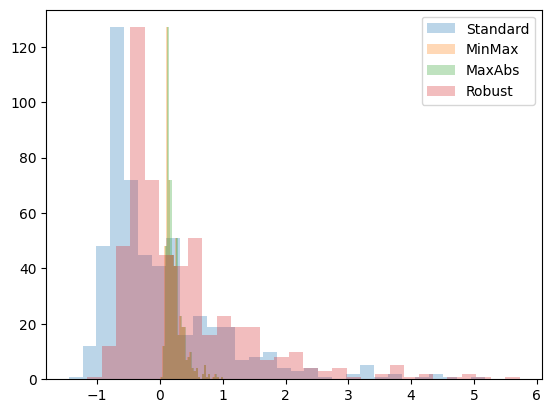

In [ ]:
plt.hist(sc, bins=30, alpha=0.3, label='Standard')
plt.hist(mms, bins=30, alpha=0.3, label='MinMax')
plt.hist(mas, bins=30, alpha=0.3, label='MaxAbs')
plt.hist(rs, bins=30, alpha=0.3, label='Robust')
plt.legend()
plt.show()


## Outliers

### IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100)
clf.fit(wage[['wage', 'educ', 'exper', 'tenure']])
clf = clf.predict(wage[['wage', 'educ', 'exper', 'tenure']]) #1 is an inlier


### LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=3)
lof = lof.fit_predict(wage[['wage', 'educ', 'exper', 'tenure']])

### Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope()
ee = ee.fit_predict(wage[['wage', 'educ', 'exper', 'tenure']])

In [ ]:
res = pd.DataFrame({'clf':clf,
              'lof':lof,
              'ee':ee})
res

,clf,lof,ee
0,1,1,1
1,1,1,1
2,1,1,1
3,-1,1,-1
4,1,1,1
...,...,...,...
521,-1,1,1
522,1,1,1
523,-1,-1,-1
524,1,1,1


## Feature selection

### SelectKBest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X, y = load_iris(return_X_y=True)

X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)

In [ ]:
X_new.shape

(150, 2)

### SelectFromModel

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

tc = DecisionTreeClassifier().fit(X, y)
model = SelectFromModel(tc, prefit=True)
X_new = model.transform(X)

In [ ]:
X_new.shape

(150, 2)